In [101]:
#Hej Jacob, kør denne celle
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote, quote
import scraping_class
from tqdm import tqdm_notebook
import requests,os,time

In [111]:
# Load the LOG
log_df = pd.read_csv('log_jacob_leg.csv', sep=',') # load the ,-separated log 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

log_df;

In [112]:
import datetime

In [113]:
dt = log_df.t.values[0]

In [127]:
log_df

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,Unnamed: 11,dt,dt_minute,dt_hour
0,0,grade_scrape,requests,1.567023e+09,-0.247491,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,9863,200,True,NaN,NaN,2019-08-28 20:06:18.621380568,2019-08-28 20:06:00.000000568,2019-08-28 20:00:00.000000568
1,1,grade_scrape,requests,1.567023e+09,-0.223534,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,12977,200,True,NaN,NaN,2019-08-28 20:06:19.741709471,2019-08-28 20:06:00.000000471,2019-08-28 20:00:00.000000471
2,2,grade_scrape,requests,1.567023e+09,-0.204447,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6883,200,True,NaN,NaN,2019-08-28 20:06:20.756166458,2019-08-28 20:06:00.000000458,2019-08-28 20:00:00.000000458
3,3,grade_scrape,requests,1.567023e+09,-0.207419,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6883,200,True,NaN,NaN,2019-08-28 20:06:21.763849258,2019-08-28 20:06:00.000000258,2019-08-28 20:00:00.000000258
4,4,grade_scrape,requests,1.567023e+09,-0.207458,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6883,200,True,NaN,NaN,2019-08-28 20:06:22.709671497,2019-08-28 20:06:00.000000497,2019-08-28 20:00:00.000000497
5,5,grade_scrape,requests,1.567023e+09,-0.206571,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6883,200,True,NaN,NaN,2019-08-28 20:06:23.669191122,2019-08-28 20:06:00.000000122,2019-08-28 20:00:00.000000122
6,6,grade_scrape,requests,1.567023e+09,-0.257299,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6883,200,True,NaN,NaN,2019-08-28 20:06:24.604116440,2019-08-28 20:06:00.000000440,2019-08-28 20:00:00.000000440
7,7,grade_scrape,requests,1.567023e+09,-0.301712,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6738,200,True,NaN,NaN,2019-08-28 20:06:25.599375010,2019-08-28 20:06:00.000000010,2019-08-28 20:00:00.000000010
8,8,grade_scrape,requests,1.567023e+09,-0.226173,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,8363,200,True,NaN,NaN,2019-08-28 20:06:26.666767597,2019-08-28 20:06:00.000000597,2019-08-28 20:00:00.000000597
9,9,grade_scrape,requests,1.567023e+09,-0.205718,http://karakterstatistik.stads.ku.dk/Histogram...,http://karakterstatistik.stads.ku.dk/Histogram...,6738,200,True,NaN,NaN,2019-08-28 20:06:27.687420607,2019-08-28 20:06:00.000000607,2019-08-28 20:00:00.000000607


In [147]:
log_df["response_code"].unique()

array([200, 500], dtype=int64)

Text(0, 0.5, 'Response code')

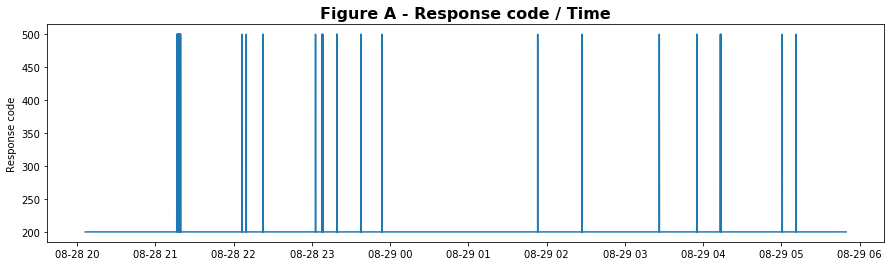

In [203]:
import datetime
# Convert the time column 't' to datetime 
log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.title("Figure A - Response code / Time", fontsize = 16, weight = "bold")
plt.plot(log_df.dt,log_df.response_code)
plt.ylabel('Response code')


Text(0, 0.5, 'Delta t')

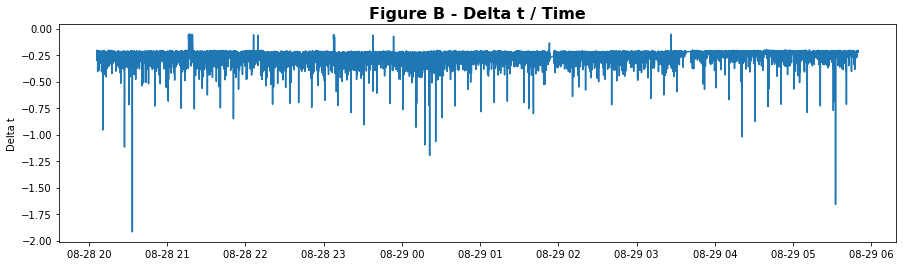

In [201]:
import datetime
# Convert the time column 't' to datetime 
log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.title("Figure B - Delta t / Time", fontsize = 16, weight = "bold")
plt.ylabel('Delta t')

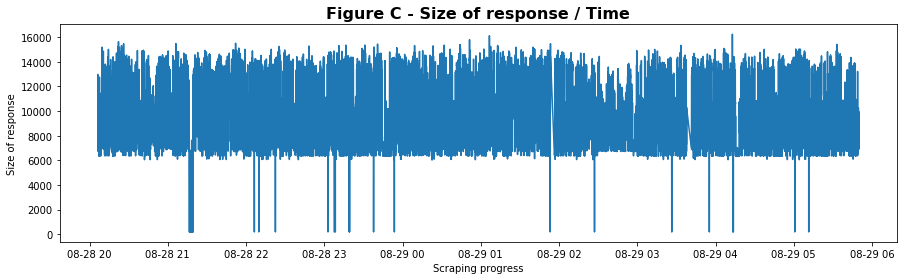

In [202]:
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.title("Figure C - Size of response / Time", fontsize = 16, weight = "bold")
plt.plot(log_df.dt,log_df.response_size)

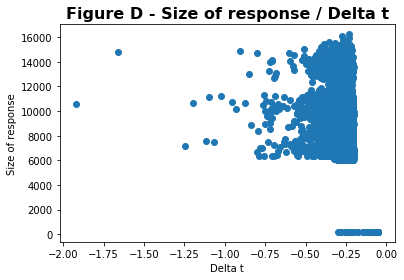

In [208]:
plt.title("Figure D - Size of response / Delta t", fontsize = 16, weight = "bold")
plt.ylabel('Size of response')
plt.xlabel('Delta t')
plt.scatter(log_df.delta_t,log_df.response_size)

In [194]:
log_df_sortbydeltat = log_df.sort_values(by="delta_t")
print(log_df_sortbydeltat["url"][1])

http://karakterstatistik.stads.ku.dk/Histogram/SFAK18001E/Winter-2018/B1


In [123]:
print(log_df.success.value_counts()) ## Count errors
print(len(log_df))
## Groupby time
# round the time for aggregation
#log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
#log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
#log_df.groupby('dt_hour').success.mean()

True    31108
Name: success, dtype: int64
31108
